In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack, join
import fitsio
# from astropy.io import fits

import healpy as hp
from matplotlib.colors import LogNorm

In [2]:
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize': 'large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large',
          'figure.facecolor': 'w'}
plt.rcParams.update(params)

In [6]:
sweep_list = ['sweep-000m005-005p000', 'sweep-000m010-005m005', 'sweep-000p000-005p005', 'sweep-000p005-005p010', 'sweep-005m005-010p000', 'sweep-005m010-010m005', 'sweep-005p000-010p005', 'sweep-005p005-010p010', 'sweep-010m005-015p000', 'sweep-010m010-015m005', 'sweep-010p000-015p005', 'sweep-010p005-015p010', 'sweep-015m005-020p000', 'sweep-015m010-020m005', 'sweep-015p000-020p005', 'sweep-015p005-020p010', 'sweep-020m005-025p000', 'sweep-020m010-025m005', 'sweep-020p000-025p005', 'sweep-020p005-025p010', 'sweep-025m005-030p000', 'sweep-025m010-030m005', 'sweep-025p000-030p005', 'sweep-025p005-030p010', 'sweep-030m005-035p000', 'sweep-030m010-035m005', 'sweep-030p000-035p005', 'sweep-030p005-035p010', 'sweep-035m005-040p000', 'sweep-035m010-040m005', 'sweep-035p000-040p005', 'sweep-035p005-040p010', 'sweep-040m005-045p000', 'sweep-040m010-045m005', 'sweep-040p000-045p005', 'sweep-040p005-045p010', 'sweep-045m005-050p000', 'sweep-045m010-050m005', 'sweep-045p000-050p005', 'sweep-045p005-050p010', 'sweep-050m005-055p000', 'sweep-050m010-055m005', 'sweep-050p000-055p005', 'sweep-050p005-055p010', 'sweep-055m005-060p000', 'sweep-055m010-060m005', 'sweep-055p000-060p005', 'sweep-055p005-060p010', 'sweep-060m005-065p000', 'sweep-060m010-065m005', 'sweep-060p000-065p005', 'sweep-060p005-065p010', 'sweep-065m005-070p000', 'sweep-065m010-070m005', 'sweep-065p000-070p005', 'sweep-065p005-070p010', 'sweep-070m005-075p000', 'sweep-070m010-075m005', 'sweep-070p000-075p005', 'sweep-070p005-075p010', 'sweep-075m005-080p000', 'sweep-075m010-080m005', 'sweep-075p000-080p005', 'sweep-075p005-080p010', 'sweep-080m005-085p000', 'sweep-080m010-085m005', 'sweep-080p000-085p005', 'sweep-085m010-090m005', 'sweep-110p000-115p005', 'sweep-110p005-115p010', 'sweep-115m005-120p000', 'sweep-115p000-120p005', 'sweep-115p005-120p010', 'sweep-120m005-125p000', 'sweep-120m010-125m005', 'sweep-120p000-125p005', 'sweep-120p005-125p010', 'sweep-125m005-130p000', 'sweep-125m010-130m005', 'sweep-125p000-130p005', 'sweep-125p005-130p010', 'sweep-130m005-135p000', 'sweep-130m010-135m005', 'sweep-130p000-135p005', 'sweep-130p005-135p010', 'sweep-135m005-140p000', 'sweep-135m010-140m005', 'sweep-135p000-140p005', 'sweep-135p005-140p010', 'sweep-140m005-145p000', 'sweep-140m010-145m005', 'sweep-140p000-145p005', 'sweep-140p005-145p010', 'sweep-145m005-150p000', 'sweep-145m010-150m005', 'sweep-145p000-150p005', 'sweep-145p005-150p010', 'sweep-150m005-155p000', 'sweep-150m010-155m005', 'sweep-150p000-155p005', 'sweep-150p005-155p010', 'sweep-155m005-160p000', 'sweep-155m010-160m005', 'sweep-155p000-160p005', 'sweep-155p005-160p010', 'sweep-160m005-165p000', 'sweep-160m010-165m005', 'sweep-160p000-165p005', 'sweep-160p005-165p010', 'sweep-165m005-170p000', 'sweep-165m010-170m005', 'sweep-165p000-170p005', 'sweep-165p005-170p010', 'sweep-170m005-175p000', 'sweep-170m010-175m005', 'sweep-170p000-175p005', 'sweep-170p005-175p010', 'sweep-175m005-180p000', 'sweep-175m010-180m005', 'sweep-175p000-180p005', 'sweep-175p005-180p010', 'sweep-180m005-185p000', 'sweep-180m010-185m005', 'sweep-180p000-185p005', 'sweep-180p005-185p010', 'sweep-185m005-190p000', 'sweep-185m010-190m005', 'sweep-185p000-190p005', 'sweep-185p005-190p010', 'sweep-190m005-195p000', 'sweep-190m010-195m005', 'sweep-190p000-195p005', 'sweep-190p005-195p010', 'sweep-195m005-200p000', 'sweep-195m010-200m005', 'sweep-195p000-200p005', 'sweep-195p005-200p010', 'sweep-200m005-205p000', 'sweep-200m010-205m005', 'sweep-200p000-205p005', 'sweep-200p005-205p010', 'sweep-205m005-210p000', 'sweep-205m010-210m005', 'sweep-205p000-210p005', 'sweep-205p005-210p010', 'sweep-210m005-215p000', 'sweep-210m010-215m005', 'sweep-210p000-215p005', 'sweep-210p005-215p010', 'sweep-215m005-220p000', 'sweep-215m010-220m005', 'sweep-215p000-220p005', 'sweep-215p005-220p010', 'sweep-220m005-225p000', 'sweep-220m010-225m005', 'sweep-220p000-225p005', 'sweep-220p005-225p010', 'sweep-225m005-230p000', 'sweep-225m010-230m005', 'sweep-225p000-230p005', 'sweep-225p005-230p010', 'sweep-230m005-235p000', 'sweep-230m010-235m005', 'sweep-230p000-235p005', 'sweep-230p005-235p010', 'sweep-235m005-240p000', 'sweep-235m010-240m005', 'sweep-235p000-240p005', 'sweep-235p005-240p010', 'sweep-240m005-245p000', 'sweep-240m010-245m005', 'sweep-240p000-245p005', 'sweep-240p005-245p010', 'sweep-245m005-250p000', 'sweep-245m010-250m005', 'sweep-245p000-250p005', 'sweep-245p005-250p010', 'sweep-250m005-255p000', 'sweep-250m010-255m005', 'sweep-250p000-255p005', 'sweep-250p005-255p010', 'sweep-255m005-260p000', 'sweep-255m010-260m005', 'sweep-255p000-260p005', 'sweep-255p005-260p010', 'sweep-260m005-265p000', 'sweep-260p000-265p005', 'sweep-260p005-265p010', 'sweep-265m005-270p000', 'sweep-265m010-270m005', 'sweep-265p005-270p010', 'sweep-290m005-295p000', 'sweep-290m010-295m005', 'sweep-290p000-295p005', 'sweep-295m005-300p000', 'sweep-295m010-300m005', 'sweep-295p000-300p005', 'sweep-300m005-305p000', 'sweep-300m010-305m005', 'sweep-300p000-305p005', 'sweep-300p005-305p010', 'sweep-305m005-310p000', 'sweep-305m010-310m005', 'sweep-305p000-310p005', 'sweep-305p005-310p010', 'sweep-310m005-315p000', 'sweep-310m010-315m005', 'sweep-310p000-315p005', 'sweep-310p005-315p010', 'sweep-315m005-320p000', 'sweep-315m010-320m005', 'sweep-315p000-320p005', 'sweep-315p005-320p010', 'sweep-320m005-325p000', 'sweep-320m010-325m005', 'sweep-320p000-325p005', 'sweep-320p005-325p010', 'sweep-325m005-330p000', 'sweep-325m010-330m005', 'sweep-325p000-330p005', 'sweep-325p005-330p010', 'sweep-330m005-335p000', 'sweep-330m010-335m005', 'sweep-330p000-335p005', 'sweep-330p005-335p010', 'sweep-335m005-340p000', 'sweep-335m010-340m005', 'sweep-335p000-340p005', 'sweep-335p005-340p010', 'sweep-340m005-345p000', 'sweep-340m010-345m005', 'sweep-340p000-345p005', 'sweep-340p005-345p010', 'sweep-345m005-350p000', 'sweep-345m010-350m005', 'sweep-345p000-350p005', 'sweep-345p005-350p010', 'sweep-350m005-355p000', 'sweep-350m010-355m005', 'sweep-350p000-355p005', 'sweep-350p005-355p010', 'sweep-355m005-360p000', 'sweep-355m010-360m005', 'sweep-355p000-360p005', 'sweep-355p005-360p010']
print(len(sweep_list))

245


In [7]:
gaia_stack = []
cat_stack = []
for sweep_fn in sweep_list:
    
    gaia = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/data/gaia_dr3/dr10_south_cross_match/'+sweep_fn+'-gaia.fits'))
    cat = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/data/gaia_dr3/dr10_south_cross_match/'+sweep_fn+'-ls.fits'))
    print(len(gaia))

    mask = gaia['PHOT_G_MEAN_MAG']<17.65
    gaia = gaia[mask]
    cat = cat[mask]
    print(len(gaia))

    # maskbits = [0, 2, 3, 4, 5, 6, 7, 10, 12, 13]
    maskbits = [0, 1, 10, 12, 13]
    mask_clean = np.ones(len(cat), dtype=bool)
    for bit in maskbits:
        mask_clean &= (cat['MASKBITS'] & 2**bit)==0
    print(np.sum(~mask_clean)/len(mask_clean))
    gaia = gaia[mask_clean]
    cat = cat[mask_clean]
    print(len(gaia))

    mask = (cat['FLUX_G']>0) & (cat['FLUX_R']>0) & (cat['FLUX_Z']>0) & (cat['FLUX_I']>0)
    mask &= (cat['FLUX_IVAR_G']>0) & (cat['FLUX_IVAR_R']>0) & (cat['FLUX_IVAR_Z']>0) & (cat['FLUX_IVAR_I']>0)
    mask &= (cat['FRACFLUX_G']<0.1) & (cat['FRACFLUX_R']<0.1) & (cat['FRACFLUX_Z']<0.1) & (cat['FRACFLUX_I']<0.1)
    gaia = gaia[mask]
    cat = cat[mask]
    print(len(gaia))
    
    gaia_stack.append(gaia)
    cat_stack.append(cat)
    print()

gaia = vstack(gaia_stack)
cat = vstack(cat_stack)

7480
7378
0.09067497966928707
6709
6657

7465
7368
0.09405537459283388
6675
6545

13791
13662
0.08724930464060898
12470
12361

18949
18817
0.08439177339639688
17229
2064

15701
15529
0.08925236654002189
14143
13971

11473
11357
0.09227789028792815
10309
10065

17888
17742
0.09136512230864616
16121
15898

18714
18568
0.08509263248599741
16988
5658

16159
16004
0.09335166208447888
14510
14316

15211
15035
0.09318257399401397
13634
13181

17110
16929
0.0920314253647587
15371
15182

18034
17892
0.08948133243907892
16291
15717

15889
15749
0.09308527525557178
14283
14129

14659
14548
0.09025295573274678
13235
12958

16944
16784
0.10110819828408008
15087
14934

18092
17956
0.08888393851637336
16360
15243

15864
15670
0.0990427568602425
14118
13925

15079
14915
0.09192088501508548
13544
13290

17116
16935
0.09016829052258636
15408
15206

18211
18054
0.09598980835271961
16321
7319

16299
16135
0.09265571738456771
14640
14486

15537
15383
0.09230969251771436
13963
13789

17260
17119
0.088089257

56978
0

123747
123606
0.05219811336019287
117154
22552

3536
3533
0.0362298330031135
3405
0

17733
17726
0.04575200270788672
16915
0

7453
7444
0.04903277807630306
7079
0

87251
87228
0.05007566377768606
82860
0

100238
100205
0.04791178084925902
95404
0

2199
2199
0.04138244656662119
2108
0

227316
227242
0.047592434497144016
216427
0

167919
167843
0.047109501140947196
159936
0

20983
20976
0.053012967200610224
19864
0

145391
145295
0.05064868027117244
137936
745

141205
141096
0.04964704881782616
134091
0

34641
34624
0.051813770794824396
32830
0

2123
2121
0.04903347477604903
2017
0

126311
126171
0.05538515189702863
119183
62543

115953
115813
0.05360365416663069
109605
48323

143207
143081
0.056240870555839
135034
9257

127581
127462
0.06053568906811442
119746
1143

94391
94191
0.05965538108736503
88572
84445

83732
83582
0.06421239022756096
78215
71451

105436
105284
0.05789103757456024
99189
29199

123610
123452
0.058233159446586524
116263
81672

68806
68672
0.061087488350419

In [8]:
print(len(cat))

4245297


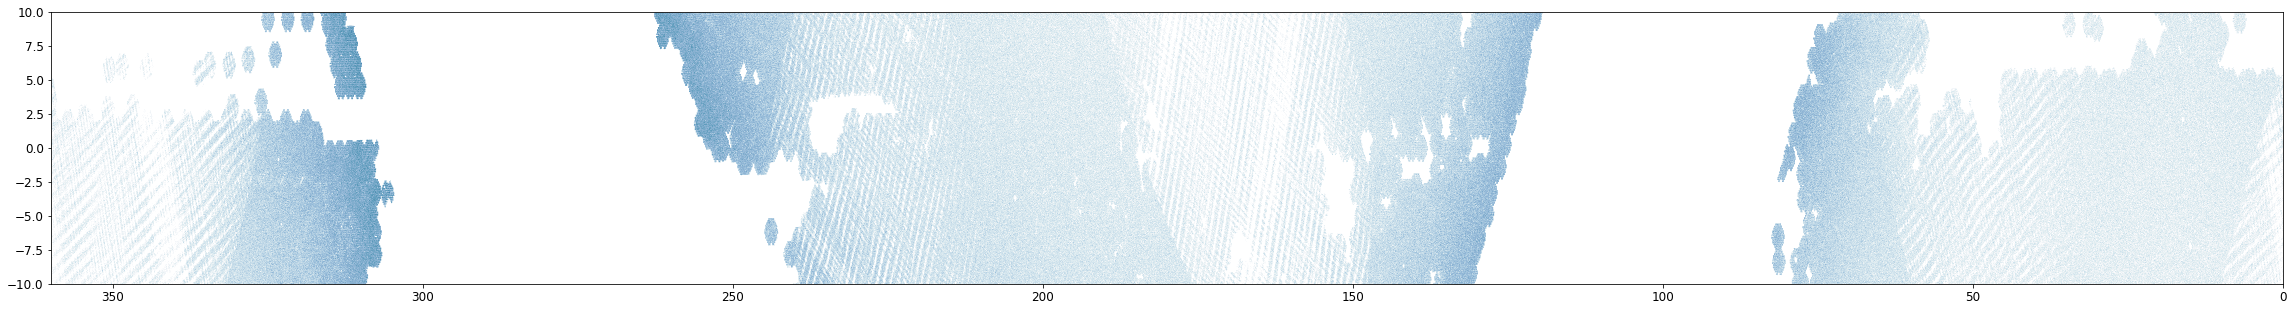

In [9]:
plt.figure(figsize=(40, 5))
plt.plot(cat['RA'], cat['DEC'], '.', ms=0.1, alpha=0.1)
plt.axis([360, 0, -10, 10])
plt.show()

In [12]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    cat['gmag'] = 22.5 - 2.5*np.log10(cat['FLUX_G'])
    cat['rmag'] = 22.5 - 2.5*np.log10(cat['FLUX_R'])
    cat['imag'] = 22.5 - 2.5*np.log10(cat['FLUX_I'])
    cat['zmag'] = 22.5 - 2.5*np.log10(cat['FLUX_Z'])
    gaia['gmag'] = 22.5 - 2.5*np.log10(gaia['flux_g'])
    gaia['rmag'] = 22.5 - 2.5*np.log10(gaia['flux_r'])
    gaia['imag'] = 22.5 - 2.5*np.log10(gaia['flux_i'])
    gaia['zmag'] = 22.5 - 2.5*np.log10(gaia['flux_z'])

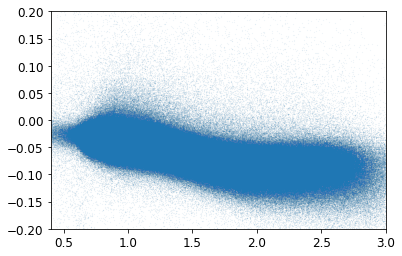

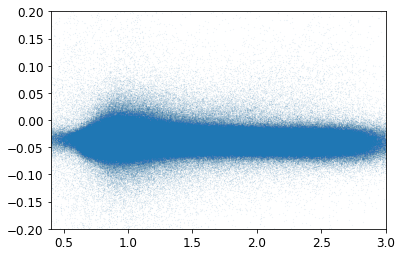

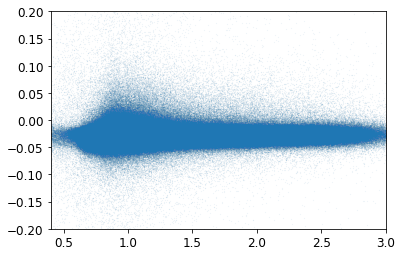

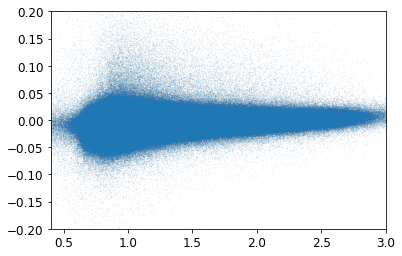

In [20]:
mask = (cat['ANYMASK_G']==0)
plt.plot(gaia['PHOT_BP_MEAN_MAG'][mask]-gaia['PHOT_RP_MEAN_MAG'][mask], (cat['gmag']-gaia['gmag'])[mask], '.', ms=00.1, alpha=0.5)
plt.axis([0.4, 3., -0.2, 0.2])
plt.show()

mask = (cat['ANYMASK_R']==0)
plt.plot(gaia['PHOT_BP_MEAN_MAG'][mask]-gaia['PHOT_RP_MEAN_MAG'][mask], (cat['rmag']-gaia['rmag'])[mask], '.', ms=00.1, alpha=0.5)
plt.axis([0.4, 3., -0.2, 0.2])
plt.show()

mask = (cat['ANYMASK_I']==0)
plt.plot(gaia['PHOT_BP_MEAN_MAG'][mask]-gaia['PHOT_RP_MEAN_MAG'][mask], (cat['imag']-gaia['imag'])[mask], '.', ms=00.1, alpha=0.5)
plt.axis([0.4, 3., -0.2, 0.2])
plt.show()

mask = (cat['ANYMASK_Z']==0)
plt.plot(gaia['PHOT_BP_MEAN_MAG'][mask]-gaia['PHOT_RP_MEAN_MAG'][mask], (cat['zmag']-gaia['zmag'])[mask], '.', ms=00.1, alpha=0.5)
plt.axis([0.4, 3., -0.2, 0.2])
plt.show()

In [14]:
import statsmodels.api as sm

def rlm_fit1d(x, y, t=1.5, order=1):
    '''
    1D robust polynomial fit.
    
    Given x array and y array, calculate the 1D robust 
    polynomial fit of arbitrary order. Huber weight
    function is used. 
    
    See also poly_val1d.py
    
    INPUT:
    1D arrays of x and y values; tunning parameter t; 
    order of the polynomial fit.
    
    OUTPUT:
    Array of parameters of the polynomial [a0, a1, a2 ...] 
    so that y = a0 + a1*x + a2*x**2 + ...
    '''
    
    ncols = order+1
    a = np.zeros((x.size,ncols))
    for i in range(order+1):
        a[:,i] = x**i
    res = sm.RLM(y, a, M=sm.robust.norms.HuberT(t=t)).fit()
    m = res.params
    return(m)

def poly_val1d(x, m):
    '''
    Evaluate the 1D polynomial from x values and polynomial parameters
    
    See also rlm_fit1d.py
    
    INPUT:
    1D array of x values; 
    1D array of polynomial parameters (for example generated by 
    rlm_fit1d.py).
    
    OUTPUT:
    1D array of the evaluated values of the polynomial.
    '''
    
    order = len(m)-1
    z = np.zeros(x.shape)
    for i in range(order+1):
        z += m[i] * x**i
    return z

In [15]:
coeffs = {}

for band in ['i']:
    mask = (cat['ANYMASK_'+band.upper()]==0)
    # mask &= (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG'])>-0.6
    # mask &= (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG'])<4.5
    mask &= (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG'])>0.5
    mask &= (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG'])<3.0
    x = (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG'])[mask]
    y = (cat[band+'mag']-gaia[band+'mag'])[mask]
    poly_order = 5
    coeffs[band] = rlm_fit1d(x, y, t=0.02, order=poly_order)
    print(band)
    print(coeffs[band])

i
[-0.0873045   0.17701739 -0.19334348  0.09961629 -0.02457898  0.00235535]


In [16]:
np.set_printoptions(precision=5)
float_formatter = "{:.10f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

coeffs

{'i': array([-0.0873044994, 0.1770173852, -0.1933434841, 0.0996162932,
        -0.0245789844, 0.0023553514])}

In [18]:
coeffs = {'g': np.array([0.0290853720, -0.2512460050, 0.4404641812, -0.3773360105,
        0.1398971000, -0.0185162342]),
 'r': np.array([-0.0611700882, 0.0716741628, -0.0648957317, 0.0248411929,
        -0.0039454092, 0.0001510852]),
 'i': np.array([-0.0873044994, 0.1770173852, -0.1933434841, 0.0996162932,
        -0.0245789844, 0.0023553514]),
 'z': np.array([-0.0606614222, 0.1323440401, -0.1156708755, 0.0470817681,
        -0.0084565308, 0.0005163927])}

__Transformations are only valid for 0.5<BP-RP<3.0__

In [21]:
for band in ['g', 'r', 'i', 'z']:
    x = (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG'])
    gaia[band+'mag_std'] = gaia[band+'mag'] + poly_val1d(x, coeffs[band])

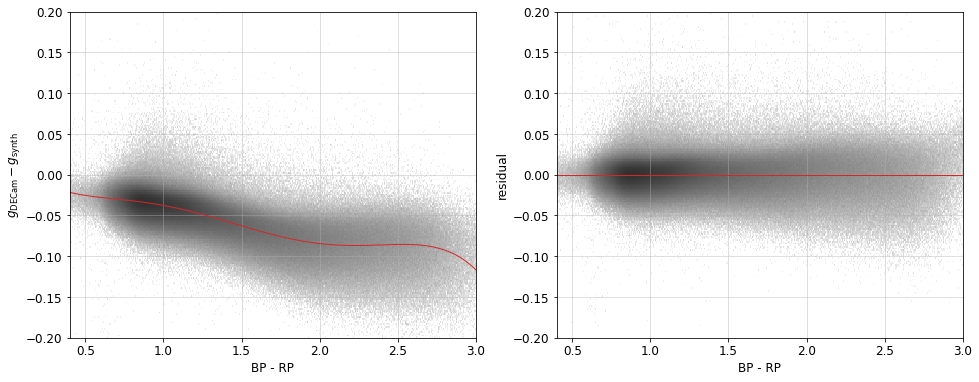

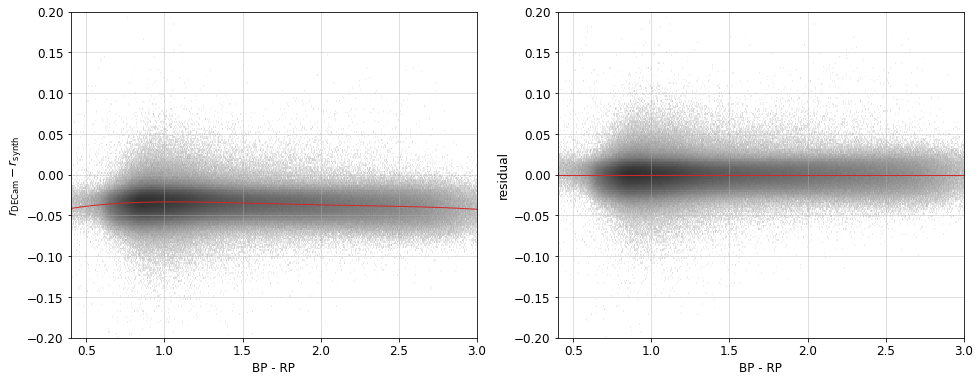

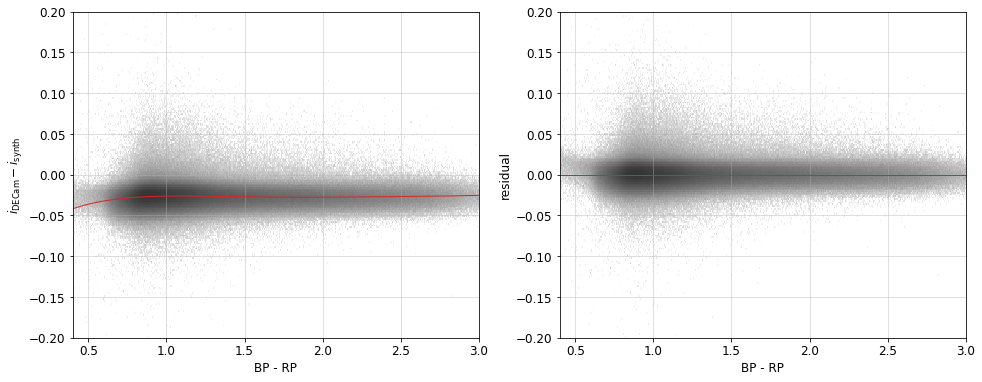

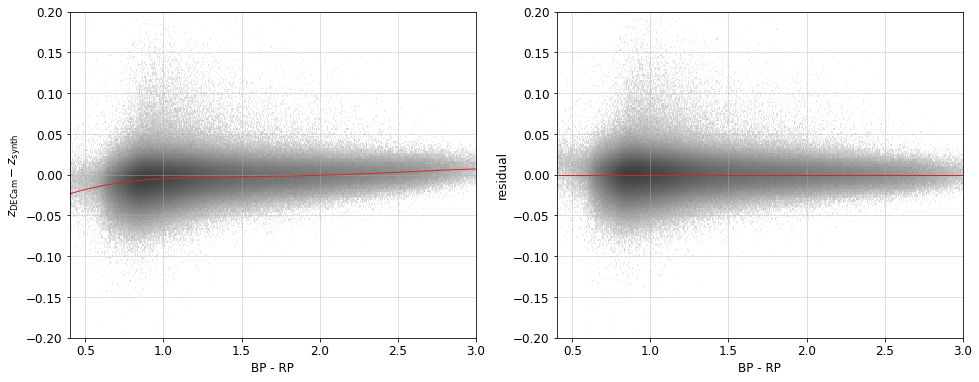

In [22]:
for band in ['g', 'r', 'i', 'z']:
    mask = (cat['ANYMASK_'+band.upper()]==0)
    x = (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG'])[mask]
    y = (cat[band+'mag']-gaia[band+'mag'])[mask]

    y_predict = poly_val1d(x, coeffs[band])
    x_plot = np.linspace(0, 4, 200)
    y_plot = poly_val1d(x_plot, coeffs[band])

    xbins, ybins = np.linspace(0.4, 3., 400), np.linspace(-0.2, 0.2, 200)

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    ax = axes[0]
    ax.hist2d(x, y, bins=[xbins, ybins], cmap='gray_r', norm=LogNorm(vmin=1, vmax=20000))
    ax.plot(x_plot, y_plot, '-', lw=1., color='C3')
    ax.set_xlabel('BP - RP')
    ylabel = '$'+band+'_\mathrm{DECam} - '+band+'_\mathrm{synth}$'
    ax.set_ylabel(ylabel)
    ax.axis([0.4, 3., -0.2, 0.2])
    ax.grid(alpha=0.5)
    ax = axes[1]
    ax.hist2d(x, y-y_predict, bins=[xbins, ybins], cmap='gray_r', norm=LogNorm(vmin=1, vmax=20000))
    ax.axhline(0, lw=1, color='C3', ls='-')
    ax.set_xlabel('BP - RP')
    ax.set_ylabel('residual')
    ax.axis([0.4, 3., -0.2, 0.2])
    ax.grid(alpha=0.5)
    plt.show()

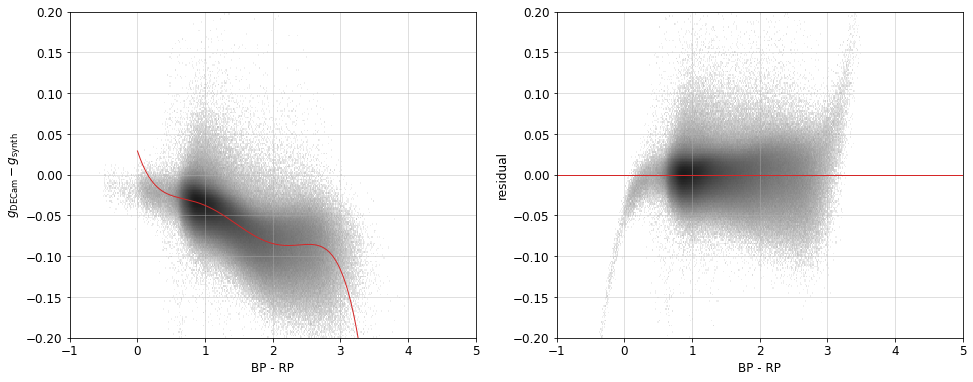

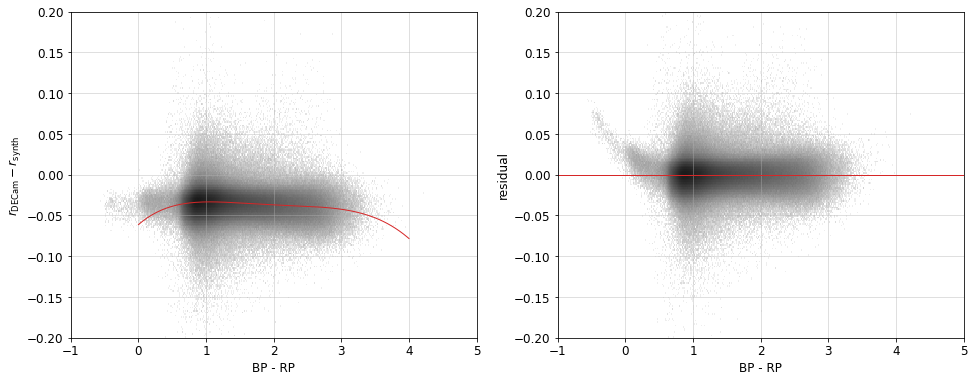

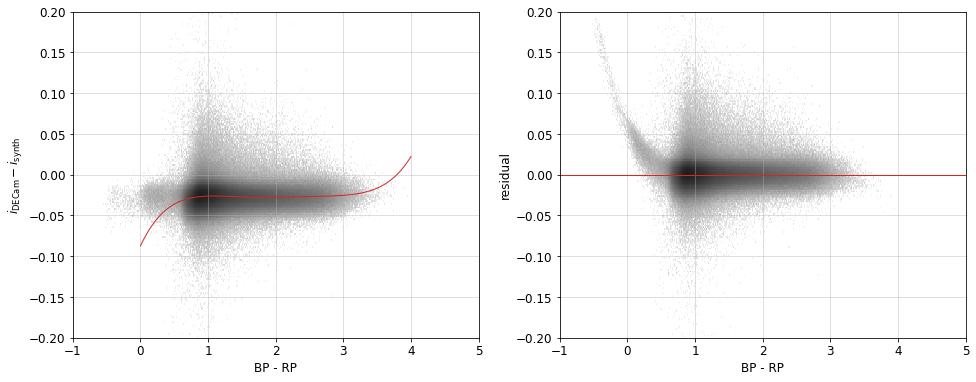

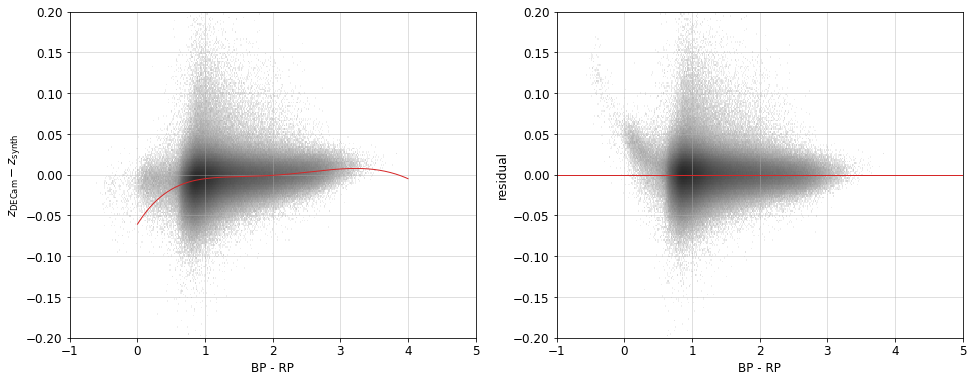

In [23]:
for band in ['g', 'r', 'i', 'z']:
    mask = (cat['ANYMASK_'+band.upper()]==0)
    x = (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG'])[mask]
    y = (cat[band+'mag']-gaia[band+'mag'])[mask]

    y_predict = poly_val1d(x, coeffs[band])
    x_plot = np.linspace(0, 4, 200)
    y_plot = poly_val1d(x_plot, coeffs[band])

    xbins, ybins = np.linspace(-1, 5, 400), np.linspace(-0.2, 0.2, 200)

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    ax = axes[0]
    ax.hist2d(x, y, bins=[xbins, ybins], cmap='gray_r', norm=LogNorm(vmin=1, vmax=20000))
    ax.plot(x_plot, y_plot, '-', lw=1., color='C3')
    ax.set_xlabel('BP - RP')
    ylabel = '$'+band+'_\mathrm{DECam} - '+band+'_\mathrm{synth}$'
    ax.set_ylabel(ylabel)
    ax.axis([-1, 5, -0.2, 0.2])
    ax.grid(alpha=0.5)
    ax = axes[1]
    ax.hist2d(x, y-y_predict, bins=[xbins, ybins], cmap='gray_r', norm=LogNorm(vmin=1, vmax=20000))
    ax.axhline(0, lw=1, color='C3', ls='-')
    ax.set_xlabel('BP - RP')
    ax.set_ylabel('residual')
    ax.axis([-1, 5, -0.2, 0.2])
    ax.grid(alpha=0.5)
    plt.show()

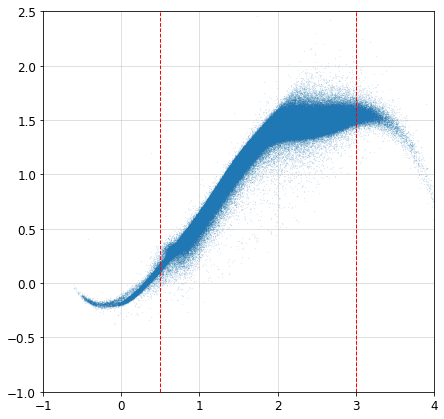

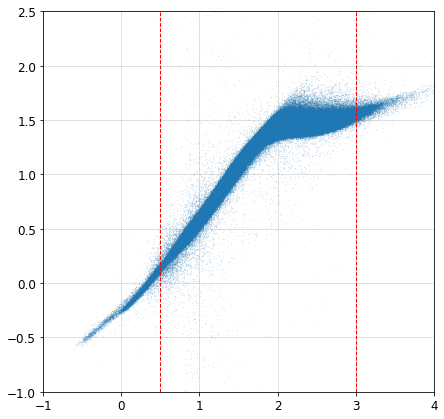

In [24]:
x = gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG']
y = gaia['gmag_std'] - gaia['rmag_std']
mask = (x<100)
plt.figure(figsize=(7, 7))
plt.plot(x[mask], y[mask], '.', ms=0.1)
plt.axis([-1, 4, -1, 2.5])
plt.axvline(0.5, lw=1, ls='--', color='r')
plt.axvline(3., lw=1, ls='--', color='r')
plt.grid(alpha=0.5)
plt.show()

x = gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG']
y = cat['gmag'] - cat['rmag']
mask = (x<100)
mask &= (cat['ANYMASK_G']==0) & (cat['ANYMASK_R']==0)
plt.figure(figsize=(7, 7))
plt.plot(x[mask], y[mask], '.', ms=0.1)
plt.axis([-1, 4, -1, 2.5])
plt.axvline(0.5, lw=1, ls='--', color='r')
plt.axvline(3., lw=1, ls='--', color='r')
plt.grid(alpha=0.5)
plt.show()

In [ ]:
band = 'i'
mask = (cat['ANYMASK_'+band.upper()]==0)
mask &= (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG'])>0.6
mask &= (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG'])<2.5
idx = np.where(mask)[0]
print(len(idx))
# idx = np.sort(np.random.choice(idx, size=len(idx)//10))

plt.figure(figsize=(40, 5))
plt.scatter(cat['RA'][idx], cat['DEC'][idx], c=(cat[band+'mag'] - gaia[band+'mag_std'])[idx], s=0.5, vmin=-0.01, vmax=0.01)
plt.axis([360, 0, -10, 10])
plt.show()

2382289
